#Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Mouting Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading Data From CSV

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Phase2/NATOPS_sid_TRAIN.csv/NATOPS_sid_TRAIN.csv')

In [10]:
data

,isTest,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,...,fea17,fea18,fea19,fea20,fea21,fea22,fea23,fea24,sid,class
0,0,-0.372758,-1.821679,-0.846321,0.465208,-2.015072,-0.839242,-0.564097,-0.796225,-0.149604,...,-1.534954,-0.673190,-0.536343,-1.626957,-0.594337,0.619205,-1.771773,-0.810086,1,3
1,0,-0.367844,-1.841987,-0.846325,0.467033,-2.007557,-0.838151,-0.564499,-0.797622,-0.150012,...,-1.532795,-0.671919,-0.533816,-1.642514,-0.605328,0.617045,-1.796660,-0.818863,1,3
2,0,-0.378445,-1.821358,-0.839571,0.471135,-2.010042,-0.832021,-0.563753,-0.795704,-0.151608,...,-1.532478,-0.671555,-0.526319,-1.697145,-0.624302,0.624789,-1.738568,-0.788060,1,3
3,0,-0.386751,-1.845643,-0.848031,0.506153,-2.032552,-0.841696,-0.565008,-0.790238,-0.152350,...,-1.535441,-0.672198,-0.554538,-1.644413,-0.602884,0.634100,-1.749744,-0.816695,1,3
4,0,-0.417101,-1.941721,-0.885500,0.611207,-1.953282,-0.902529,-0.573550,-0.799730,-0.169575,...,-1.482552,-0.659393,-0.576196,-1.763092,-0.694843,0.680086,-1.664565,-0.857897,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,1,-0.845492,-1.919878,-0.583276,0.856647,-1.978063,-0.553987,-0.790264,-0.770808,-0.075527,...,-1.527194,-0.315056,-0.889773,-1.684754,-0.651485,0.870652,-1.659452,-0.607189,360,3
18356,1,-0.761116,-1.945017,-0.587023,0.680567,-1.992559,-0.566642,-0.759338,-0.790078,-0.090382,...,-1.501386,-0.315699,-0.642052,-1.659315,-0.660619,0.754220,-1.727294,-0.618963,360,3
18357,1,-0.679080,-1.933950,-0.615705,0.574144,-1.986102,-0.572386,-0.741427,-0.793610,-0.100764,...,-1.503965,-0.324704,-0.609636,-1.705025,-0.690759,0.568415,-1.877402,-0.412571,360,3
18358,1,-0.670308,-1.916436,-0.634439,0.478221,-2.078024,-0.620835,-0.731334,-0.790556,-0.109856,...,-1.612530,-0.412526,-0.560203,-1.678066,-0.716252,0.550804,-1.903281,-0.472645,360,3


#Extracting Relevant columns

In [11]:
features_df = data.drop(['isTest', 'sid', 'class'], axis =1)
features_df

,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea15,fea16,fea17,fea18,fea19,fea20,fea21,fea22,fea23,fea24
0,-0.372758,-1.821679,-0.846321,0.465208,-2.015072,-0.839242,-0.564097,-0.796225,-0.149604,0.599967,...,-0.515990,0.577993,-1.534954,-0.673190,-0.536343,-1.626957,-0.594337,0.619205,-1.771773,-0.810086
1,-0.367844,-1.841987,-0.846325,0.467033,-2.007557,-0.838151,-0.564499,-0.797622,-0.150012,0.597535,...,-0.537491,0.576627,-1.532795,-0.671919,-0.533816,-1.642514,-0.605328,0.617045,-1.796660,-0.818863
2,-0.378445,-1.821358,-0.839571,0.471135,-2.010042,-0.832021,-0.563753,-0.795704,-0.151608,0.597007,...,-0.510966,0.576456,-1.532478,-0.671555,-0.526319,-1.697145,-0.624302,0.624789,-1.738568,-0.788060
3,-0.386751,-1.845643,-0.848031,0.506153,-2.032552,-0.841696,-0.565008,-0.790238,-0.152350,0.599099,...,-0.530980,0.579362,-1.535441,-0.672198,-0.554538,-1.644413,-0.602884,0.634100,-1.749744,-0.816695
4,-0.417101,-1.941721,-0.885500,0.611207,-1.953282,-0.902529,-0.573550,-0.799730,-0.169575,0.606181,...,-0.658221,0.626759,-1.482552,-0.659393,-0.576196,-1.763092,-0.694843,0.680086,-1.664565,-0.857897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,-0.845492,-1.919878,-0.583276,0.856647,-1.978063,-0.553987,-0.790264,-0.770808,-0.075527,0.673925,...,-0.402750,0.857950,-1.527194,-0.315056,-0.889773,-1.684754,-0.651485,0.870652,-1.659452,-0.607189
18356,-0.761116,-1.945017,-0.587023,0.680567,-1.992559,-0.566642,-0.759338,-0.790078,-0.090382,0.630602,...,-0.426398,0.737224,-1.501386,-0.315699,-0.642052,-1.659315,-0.660619,0.754220,-1.727294,-0.618963
18357,-0.679080,-1.933950,-0.615705,0.574144,-1.986102,-0.572386,-0.741427,-0.793610,-0.100764,0.607822,...,-0.430941,0.659843,-1.503965,-0.324704,-0.609636,-1.705025,-0.690759,0.568415,-1.877402,-0.412571
18358,-0.670308,-1.916436,-0.634439,0.478221,-2.078024,-0.620835,-0.731334,-0.790556,-0.109856,0.600801,...,-0.438325,0.597387,-1.612530,-0.412526,-0.560203,-1.678066,-0.716252,0.550804,-1.903281,-0.472645


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

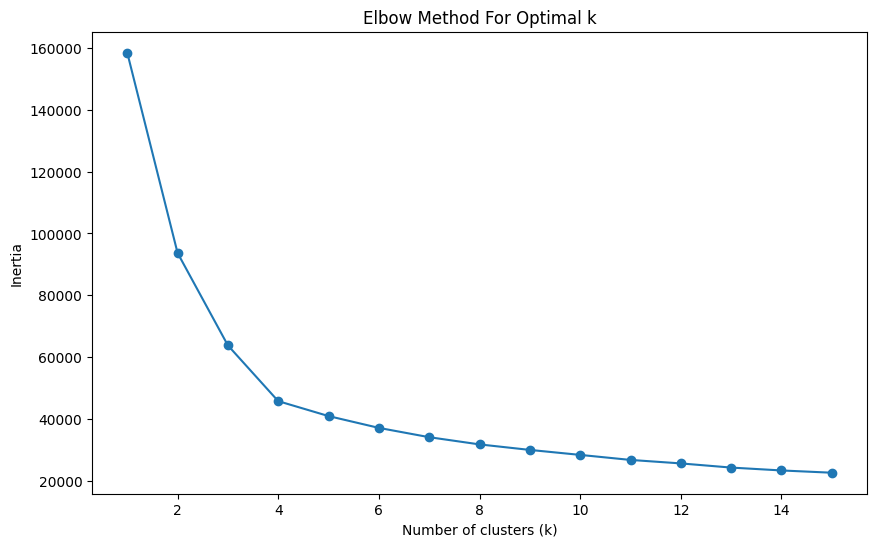

In [12]:
num_clusters = range(1, 16)
inertia = []

# Calculate inertia for each number of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[features_df.columns])
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [19]:
no_of_clusters=4

#Applying KMeans Clustering

In [20]:
kmeans = KMeans(n_clusters=no_of_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features_df.columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Calculating the ratio of each cluster for each sample

In [24]:
cluster_ratios = data.groupby('sid')['cluster'].value_counts(normalize=True).unstack(fill_value=0)
cluster_ratio_data = cluster_ratios.reset_index()
cluster_ratio_data.columns = ['sid'] + [f'cluster_{i}_ratio' for i in range(4)]

#Creating a new dataframe with the desired format

In [25]:
final_data = pd.merge(data, cluster_ratio_data, on='sid', how='left')
final_data = final_data.drop(features_df.columns, axis=1)

#Saving the final data to a CSV file

In [26]:
final_data.to_csv('final_data.csv', index=False)

#Final_data head

In [27]:
print(final_data.head())

   isTest  sid  class  cluster  cluster_0_ratio  cluster_1_ratio  \
0       0    1      3        0          0.45098         0.294118   
1       0    1      3        0          0.45098         0.294118   
2       0    1      3        0          0.45098         0.294118   
3       0    1      3        0          0.45098         0.294118   
4       0    1      3        0          0.45098         0.294118   

   cluster_2_ratio  cluster_3_ratio  
0         0.254902              0.0  
1         0.254902              0.0  
2         0.254902              0.0  
3         0.254902              0.0  
4         0.254902              0.0  
